# SDE

## Example 1

$$
dX_t = \sigma dW_t, \quad X(0)=X_0.
$$

Euler-Maruyama method:
$$
\hat{X}(t_{n+1}) = \hat{X}(t_{n}) + \sigma\sqrt{\Delta t}Z(t_n), 
$$
where $Z(t_i)$ are iid with $N(0, 1)$. 

It can be shown that 
$$
E[X(t)] = X_0, \quad \text{Var}[X(t)] = \sigma^2 t.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample 

In [2]:
# We assume X_0 = 0

sigma = 2

# T: Terminal time
T = 3

# N: number of trials
N = 1000

# M: number of steps
M = 20
dt = T/M
time = np.linspace(0, T, M+1)

In [3]:
# Euler-Maruyama method:
X_0 = np.zeros((N, M+1))
for ii in range(M):
    X_0[:, ii+1] = X_0[:, ii] + sigma*np.sqrt(dt)*np.random.randn(N)


In [4]:
mean = np.mean(X_0[:,M])
std = np.std(X_0[:,M])
y = np.linspace(-10, 10, 100)
pdf = np.exp(-0.5*((y-mean)/std)**2)/std/np.sqrt(2.0*np.pi)

The right panel shows the results at X(t=1) and its maximum likelihood estimation (MLE).
MLE:
meam =  0.060406681799830685
std =  3.326125162013477

Theoretical results
Theoretical meam =  0
Theoretical std =  3.4641016151377544


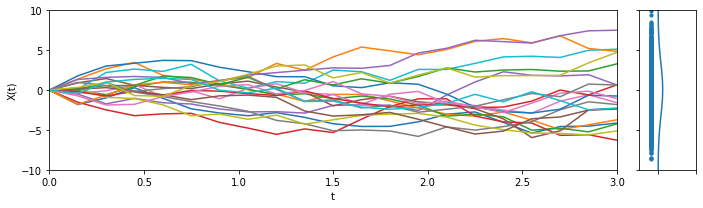

In [5]:
print('The right panel shows the results at X(t=1) and its maximum likelihood estimation (MLE).')
print('MLE:')
print('meam = ', mean)
print('std = ', std)
print('')
print('Theoretical results')
print('Theoretical meam = ', 0)
print('Theoretical std = ', sigma*np.sqrt(T))

f, (a0, a1) = plt.subplots(1, 2, figsize=(10, 3), gridspec_kw={'width_ratios': [10, 1]})
for ii in sample(range(N), 20):
    a0.plot(time, X_0[ii,:])

a0.set_xlim(0, T)
a0.set_ylim(-10, 10)
a0.set(xlabel='t')
a0.set(ylabel='X(t)')

a1.scatter(X_0[:,M]*0-0.2, X_0[:,M], s=10.0)
a1.plot(pdf, y)
a1.set_xlim(-0.5, 1)
a1.set_ylim(-10, 10)
a1.set_xticklabels([])
a1.set_yticklabels([])

f.tight_layout()
#plt.show()

## Example 2

$$
dX_t = \mu dt + \sigma dW_t, \quad X(0)=X_0.
$$

Euler-Maruyama method:
$$
\hat{X}(t_{n+1}) = \hat{X}(t_{n}) + \mu \Delta t + \sigma\sqrt{\Delta t}Z(t_n), 
$$
where $Z(t_i)$ are iid with $N(0, 1)$. 

It can be shown that 
$$
E[X(t)] = X_0+\mu t, \quad \text{Var}[X(t)] = \sigma^2 t.
$$

In [6]:
# We assume X_0 = 0

mu = 3
sigma = 2

# T: Terminal time
T = 0.5

# N: number of trials
N = 1000

# M: number of steps
M = 20
dt = T/M
time = np.linspace(0, T, M+1)

In [7]:
# Euler-Maruyama method:
X_0 = np.zeros((N, M+1))
for ii in range(M):
    X_0[:, ii+1] = X_0[:, ii] + mu*dt + sigma*np.sqrt(dt)*np.random.randn(N)
    

In [8]:
mean = np.mean(X_0[:,M])
std = np.std(X_0[:,M])
y = np.linspace(-10, 10, 100)
pdf = np.exp(-0.5*((y-mean)/std)**2)/std/np.sqrt(2.0*np.pi)

The right panel shows the results at X(t=1) and its maximum likelihood estimation (MLE).
MLE:
meam =  1.5020143158125443
std =  1.434070790134303

Theoretical results
Theoretical meam =  1.5
Theoretical std =  1.4142135623730951


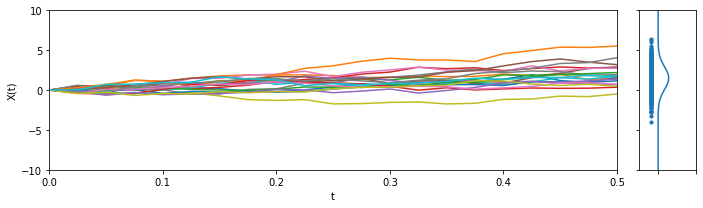

In [9]:
print('The right panel shows the results at X(t=1) and its maximum likelihood estimation (MLE).')
print('MLE:')
print('meam = ', mean)
print('std = ', std)
print('')
print('Theoretical results')
print('Theoretical meam = ', mu*T)
print('Theoretical std = ', sigma*np.sqrt(T))

f, (a0, a1) = plt.subplots(1, 2, figsize=(10, 3), gridspec_kw={'width_ratios': [10, 1]})
for ii in sample(range(N), 20):
    a0.plot(time, X_0[ii,:])

a0.set_xlim(0, T)
a0.set_ylim(-10, 10)
a0.set(xlabel='t')
a0.set(ylabel='X(t)')

a1.scatter(X_0[:,M]*0-0.2, X_0[:,M], s=10.0)
a1.plot(pdf, y)
a1.set_xlim(-0.5, 1)
a1.set_ylim(-10, 10)
a1.set_xticklabels([])
a1.set_yticklabels([])

f.tight_layout()
#plt.show()

## Example 3: Ornstein-Uhenbeck process

$$
dX_t = -\beta X_t dt + \sigma dW_t, \quad X(0)=X_0, \quad \beta,\sigma >0.
$$

Euler-Maruyama method:
$$
\hat{X}(t_{n+1}) = \hat{X}(t_{n}) - \beta \hat{X}(t_{n}) \Delta t + \sigma\sqrt{\Delta t}Z(t_n), 
$$
where $Z(t_i)$ are iid with $N(0, 1)$. 

It can be shown that, if $X(0)\equiv X_0$, a constant, then
$$
E[X(t)] = e^{-\beta t}X_0, \quad \text{Var}[X(t)] = \frac{\sigma^2}{2\beta}\left(1 - e^{-2\beta t}\right).
$$

In [10]:
# We assume X_0 = 0

beta = 3
sigma = 2

# T: Terminal time
T = 2

# N: number of trials
N = 10000

# M: number of steps
M = 20
dt = T/M
time = np.linspace(0, T, M+1)

In [11]:
# Euler-Maruyama method:
X_0 = np.zeros((N, M+1))
for ii in range(M):
    X_0[:, ii+1] = X_0[:, ii] - beta*dt*X_0[:, ii] + sigma*np.sqrt(dt)*np.random.randn(N)
    

In [12]:
mean = np.mean(X_0[:,M])
std = np.std(X_0[:,M])
y = np.linspace(-10, 10, 100)
pdf = np.exp(-0.5*((y-mean)/std)**2)/std/np.sqrt(2.0*np.pi)

The right panel shows the results at X(t=1) and its maximum likelihood estimation (MLE).
MLE:
meam =  -0.003739620198182813
std =  0.8890700559270184

Theoretical results
Theoretical meam =  0
Theoretical std =  0.8164940725596835


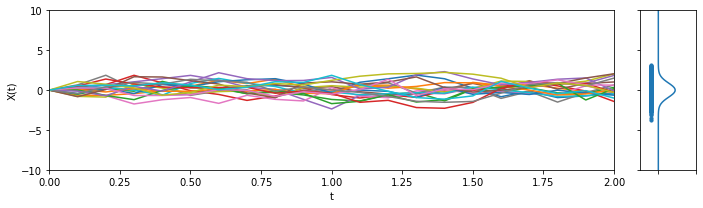

In [13]:
print('The right panel shows the results at X(t=1) and its maximum likelihood estimation (MLE).')
print('MLE:')
print('meam = ', mean)
print('std = ', std)
print('')
print('Theoretical results')
print('Theoretical meam = ', 0)
print('Theoretical std = ', np.sqrt((sigma**2)*(1-np.exp(-2.0*beta*T))/(2.0*beta)))

f, (a0, a1) = plt.subplots(1, 2, figsize=(10, 3), gridspec_kw={'width_ratios': [10, 1]})
for ii in sample(range(N), 20):
    a0.plot(time, X_0[ii,:])

a0.set_xlim(0, T)
a0.set_ylim(-10, 10)
a0.set(xlabel='t')
a0.set(ylabel='X(t)')

a1.scatter(X_0[:,M]*0-0.2, X_0[:,M], s=10.0)
a1.plot(pdf, y)
a1.set_xlim(-0.5, 1)
a1.set_ylim(-10, 10)
a1.set_xticklabels([])
a1.set_yticklabels([])

f.tight_layout()
#plt.show()

## Example 3: Ornstein-Uhenbeck process

### Part II

$$
dX_t = -\beta X_t dt + \sigma dW_t, \quad X(0)=X_0, \quad \beta,\sigma >0.
$$

Euler-Maruyama method:
$$
\hat{X}(t_{n+1}) = \hat{X}(t_{n}) - \beta \hat{X}(t_{n}) \Delta t + \sigma\sqrt{\Delta t}Z(t_n), 
$$
where $Z(t_i)$ are iid with $N(0, 1)$. 

If $X(0)\sim N(\mu_0, \sigma^2_0)$, then
$$
E[X(t)] = e^{-\beta t}\mu_0, \quad \text{Var}[X(t)] = e^{-2\beta t}\sigma_0^2 + \frac{\sigma^2}{2\beta}\left(1 - e^{-2\beta t}\right).
$$

In [14]:
beta = 1
sigma = 0.1

mu_0 = 0.2
sigma_0 = 2

# T: Terminal time
T = 2

# N: number of trials
N = 1000

# M: number of steps
M = 20
dt = T/M
time = np.linspace(0, T, M+1)

In [15]:
# Euler-Maruyama method:
X_0 = np.zeros((N, M+1))
X_0[:,0] = sigma_0*np.random.randn(N) + mu_0
for ii in range(M):
    X_0[:, ii+1] = X_0[:, ii] - beta*dt*X_0[:, ii] + sigma*np.sqrt(dt)*np.random.randn(N)
    

In [16]:
mean = np.mean(X_0[:,M])
std = np.std(X_0[:,M])
y = np.linspace(-10, 10, 100)
pdf = np.exp(-0.5*((y-mean)/std)**2)/std/np.sqrt(2.0*np.pi)

The right panel shows the results at X(t=1) and its maximum likelihood estimation (MLE).
MLE:
meam =  0.021762569536982957
std =  0.2533726768666453

Theoretical results
Theoretical meam =  0.027067056647322542
Theoretical std =  0.279590731893053


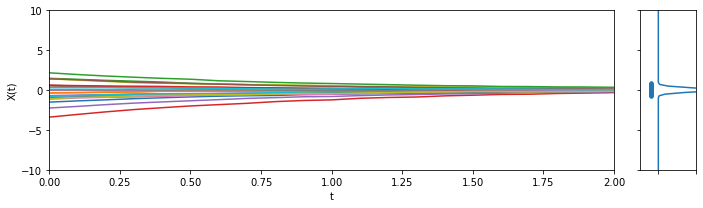

In [17]:
print('The right panel shows the results at X(t=1) and its maximum likelihood estimation (MLE).')
print('MLE:')
print('meam = ', mean)
print('std = ', std)
print('')
print('Theoretical results')
print('Theoretical meam = ', np.exp(-beta*T)*mu_0)
print('Theoretical std = ', np.sqrt(np.exp(-2.0*beta*T)*(sigma_0**2)+(sigma**2)*(1-np.exp(-2.0*beta*T))/(2.0*beta)))

f, (a0, a1) = plt.subplots(1, 2, figsize=(10, 3), gridspec_kw={'width_ratios': [10, 1]})
for ii in sample(range(N), 20):
    a0.plot(time, X_0[ii,:])

a0.set_xlim(0, T)
a0.set_ylim(-10, 10)
a0.set(xlabel='t')
a0.set(ylabel='X(t)')

a1.scatter(X_0[:,M]*0-0.2, X_0[:,M], s=10.0)
a1.plot(pdf, y)
a1.set_xlim(-0.5, 1)
a1.set_ylim(-10, 10)
a1.set_xticklabels([])
a1.set_yticklabels([])

f.tight_layout()
#plt.show()